In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
import warning
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
ff=pd.read_csv(r"F:\Data Science\Assignments\Completed\17. SVM\forestfires.csv")
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# Assigning Dummy Variables

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
def label_encoding(ff):
    
    for column_name in ff.columns:
        if ff[column_name].dtype == object:
            ff[column_name] = le.fit_transform(ff[column_name])
        else:
            pass

In [5]:
label_encoding(ff)
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<AxesSubplot:xlabel='size_category', ylabel='count'>

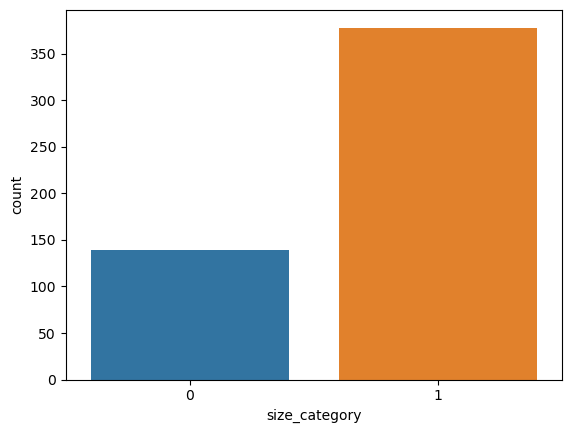

In [6]:
sns.countplot(ff['size_category'])

In [7]:
ff.shape

(517, 31)

In [8]:
ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
ff[ff.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,1,6,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
100,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1
215,7,2,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,0
303,6,0,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,1
426,1,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,1
461,1,2,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
501,1,5,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,1
508,1,0,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
ff=ff.drop_duplicates()

In [11]:
ff[ff.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [12]:
ff.shape

(509, 31)

In [13]:
numerical_features=ff.describe(include=['int32','float64','int64']).columns
numerical_features

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [14]:
# detect outliers
def outlier(ff):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in ff.columns.tolist():
        Q1 = np.percentile(ff[col], 25)
        Q3 = np.percentile(ff[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = ff[(ff[col] < Q1 - outlier_step) | (ff[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier(ff[numerical_features]))))
print(outlier(ff[numerical_features]))

The dataset contains 69 observations with more than 2 outliers
[17, 40, 58, 75, 96, 97, 104, 105, 110, 130, 138, 165, 176, 181, 196, 202, 233, 239, 241, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 284, 299, 304, 379, 390, 394, 395, 407, 410, 411, 463, 464, 465, 513, 516, 374, 392, 422, 283, 22, 211, 475, 504, 3, 4, 286, 162, 168, 469, 210, 213, 214, 219, 222, 223, 226, 293, 471, 473, 479]


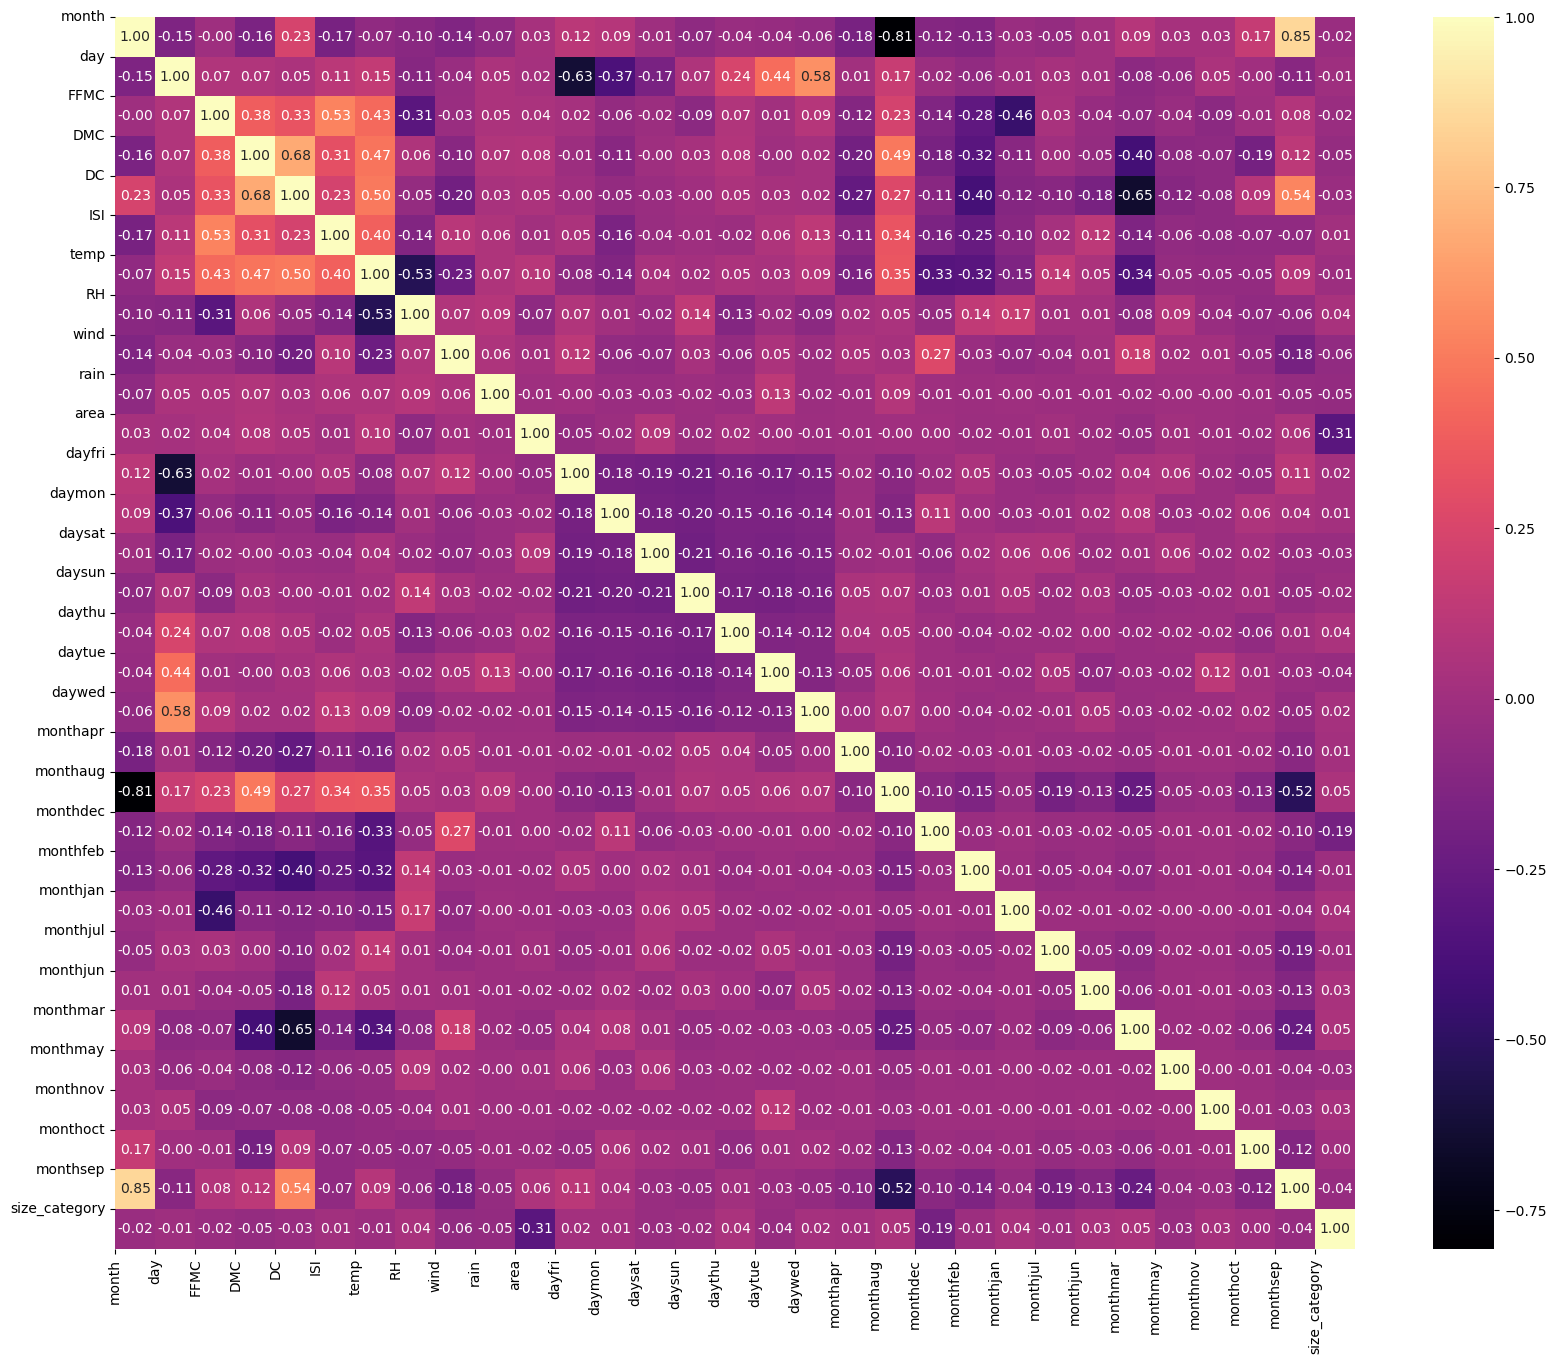

In [15]:
corr = ff.corr()
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [16]:
# applying standardization
scaler=StandardScaler()
ff_std=scaler.fit_transform(ff.drop(['size_category'],axis=1))
ff_std

array([[ 2.71858196e-01, -1.42449474e+00, -7.96039810e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 9.58019296e-01,  1.17804590e+00, -3.25665522e-03, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [ 9.58019296e-01, -3.83478484e-01, -3.25665522e-03, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.10046400e+00,  1.37029645e-01, -1.62485856e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-1.10046400e+00, -3.83478484e-01,  6.81419706e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 7.29298930e-01,  1.17804590e+00, -2.00323234e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [17]:
# pca=PCA(random_state=10,n_components=0.95)
# ff_pca=pca.fit_transform(ff_std)
# ff_pca

In [18]:
# print(pca.singular_values_)

In [19]:
# np.round(np.cumsum(pca.explained_variance_ratio_*100),decimals=2)

In [20]:
# finalDF=pd.concat([pd.DataFrame(ff_pca[:,0:16],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16'])],axis=1)
# finalDF

In [21]:
from sklearn import svm
from sklearn.svm import SVC

In [22]:
X=ff_std
Y=ff['size_category'].values

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [24]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [25]:
y_pred=clf.predict(x_test)

In [26]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [27]:
acc=accuracy_score(y_test,y_pred)*100
print('accuracy=',acc)

accuracy= 75.81699346405229


In [28]:
confusion_matrix(y_test,y_pred)

array([[  4,  37],
       [  0, 112]], dtype=int64)

In [29]:
# Hyperparameter tuning
param_grid={'C':np.arange(0.1,10), 'gamma':[0.001,0.01,0.1,0.2,0.5,0.9,1,10],'kernel':['rbf','linear']}

grid=RandomizedSearchCV(clf,param_distributions=param_grid,cv=5,random_state=42,n_jobs=-1)

grid.fit(x_train,y_train)
print(grid.best_params_)

{'kernel': 'linear', 'gamma': 1, 'C': 8.1}


In [30]:
clf1=SVC(C=8.1,gamma=1,kernel='linear')
clf1.fit(x_train,y_train)

SVC(C=8.1, gamma=1, kernel='linear')

In [31]:
y_pred1=clf1.predict(x_train)

In [32]:
accu=accuracy_score(y_train,y_pred1)*100
print("accuracy score=",accu)

accuracy score= 98.31460674157303


In [33]:
confusion_matrix(y_train,y_pred1)

array([[ 92,   5],
       [  1, 258]], dtype=int64)

In [34]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        97
           1       0.98      1.00      0.99       259

    accuracy                           0.98       356
   macro avg       0.99      0.97      0.98       356
weighted avg       0.98      0.98      0.98       356



In [35]:
y_pred_test=clf1.predict(x_test)

In [36]:
accu=accuracy_score(y_test,y_pred_test)*100
print("accuracy score=",accu)

accuracy score= 95.42483660130719


In [37]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        41
           1       0.96      0.98      0.97       112

    accuracy                           0.95       153
   macro avg       0.95      0.93      0.94       153
weighted avg       0.95      0.95      0.95       153



In [38]:
y_pred_df=pd.DataFrame({'actual':y_test,'Prediction':y_pred_test})
y_pred_df['Correct']=y_pred_df['actual']==y_pred_df['Prediction']
y_pred_df

,actual,Prediction,Correct
0,1,1,True
1,1,1,True
2,0,0,True
3,0,0,True
4,1,1,True
...,...,...,...
148,0,0,True
149,1,1,True
150,1,1,True
151,1,1,True


In [39]:
y_pred_df['Correct'].value_counts()

True     146
False      7
Name: Correct, dtype: int64

In [40]:
y_pred_df[y_pred_df['Correct']==False]

,actual,Prediction,Correct
19,0,1,False
44,0,1,False
57,0,1,False
97,1,0,False
102,0,1,False
109,1,0,False
142,0,1,False
